# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment.

In [1]:
!pip install plotly==4.9.0

In [3]:
# import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
dataset = pd.read_csv("Speed Dating Data.csv", encoding = "Windows-1252")

In [5]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(8378, 195)

In [7]:
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

# Filtering

In [8]:
# création d'un filtre pour garder les colonnes intéréssantes
Fltr = ["id","iid","pid","partner","order","gender","idg","condtn","wave","round","position","positin1","match","int_corr","samerace", "age_o","race_o","pf_o_att","dec_o","attr_o","age","field","field_cd","go_out","tuition","imprace","from","zipcode","income","goal","pf_o_sin","pf_o_int", "attr1_1", "sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1","attr2_1", "sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1","attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1","attr4_1", "sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1", "attr5_1", "sinc5_1","intel5_1","fun5_1","amb5_1", "exphappy", "match_es"]

In [11]:
# copie du dataset
df = dataset.copy()

In [12]:
# application du filtre
df = df[Fltr]

In [13]:
df.describe()

,id,iid,pid,partner,order,gender,idg,condtn,wave,round,...,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,exphappy,match_es
count,8377.000000,8378.000000,8368.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,...,6489.000000,6489.000000,6467.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8277.000000,7205.000000
mean,8.960248,283.675937,283.863767,8.963595,8.927668,0.500597,17.327166,1.828837,11.350919,16.872046,...,15.566805,9.780089,11.014845,6.941908,7.927232,8.284346,7.426213,7.617611,5.534131,3.207814
std,5.491329,158.583367,158.584899,5.491068,5.477009,0.500029,10.940735,0.376673,5.995903,4.358458,...,7.328256,6.998428,6.060150,1.498653,1.627054,1.283657,1.779129,1.773094,1.734059,2.444813
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000
25%,4.000000,154.000000,154.000000,4.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,...,10.000000,5.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,5.000000,2.000000
50%,8.000000,281.000000,281.000000,8.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,...,15.000000,10.000000,10.000000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,3.000000
75%,13.000000,407.000000,408.000000,13.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,...,20.000000,15.000000,15.000000,8.000000,9.000000,9.000000,9.000000,9.000000,7.000000,4.000000
max,22.000000,552.000000,552.000000,22.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,...,45.000000,50.000000,40.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


In [14]:
df.shape

(8378, 62)

In [15]:
df.head()

,id,iid,pid,partner,order,gender,idg,condtn,wave,round,...,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,exphappy,match_es
0,1.0,1,11.0,1,4,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
1,1.0,1,12.0,2,3,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
2,1.0,1,13.0,3,10,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
3,1.0,1,14.0,4,5,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
4,1.0,1,15.0,5,7,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0


In [21]:
#Visualisation des information d'un participants dans la première vague
df[(df.iid == 1) & (df.wave == 1)]

,id,iid,pid,partner,order,gender,idg,condtn,wave,round,...,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,exphappy,match_es
0,1.0,1,11.0,1,4,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
1,1.0,1,12.0,2,3,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
2,1.0,1,13.0,3,10,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
3,1.0,1,14.0,4,5,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
4,1.0,1,15.0,5,7,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
5,1.0,1,16.0,6,6,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
6,1.0,1,17.0,7,1,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
7,1.0,1,18.0,8,2,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
8,1.0,1,19.0,9,8,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
9,1.0,1,20.0,10,9,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0


In [17]:
# connaitre le nombre total de particpants
len(df.iid.unique())

551

In [22]:
# connaitre le nombre de lignes
num_rows = df.shape[0]
num_rows

8378

In [23]:
#connaitre le pourcentage des données vides dans les colonnes (donnée vide n'est pas forcément à suppremier (exemple le particpant a le choix de ne pas la renseigner))
cols_nan = (df.isna().sum()/num_rows)*100
cols_nan

id           0.011936
iid          0.000000
pid          0.119360
partner      0.000000
order        0.000000
              ...    
intel5_1    41.441872
fun5_1      41.441872
amb5_1      41.441872
exphappy     1.205538
match_es    14.000955
Length: 62, dtype: float64

In [24]:
df.columns

Index(['id', 'iid', 'pid', 'partner', 'order', 'gender', 'idg', 'condtn',
       'wave', 'round', 'position', 'positin1', 'match', 'int_corr',
       'samerace', 'age_o', 'race_o', 'pf_o_att', 'dec_o', 'attr_o', 'age',
       'field', 'field_cd', 'go_out', 'tuition', 'imprace', 'from', 'zipcode',
       'income', 'goal', 'pf_o_sin', 'pf_o_int', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1',
       'intel3_1', 'fun3_1', 'amb3_1', 'attr4_1', 'sinc4_1', 'intel4_1',
       'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1', 'sinc5_1', 'intel5_1',
       'fun5_1', 'amb5_1', 'exphappy', 'match_es'],
      dtype='object')

### Mission values per column

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


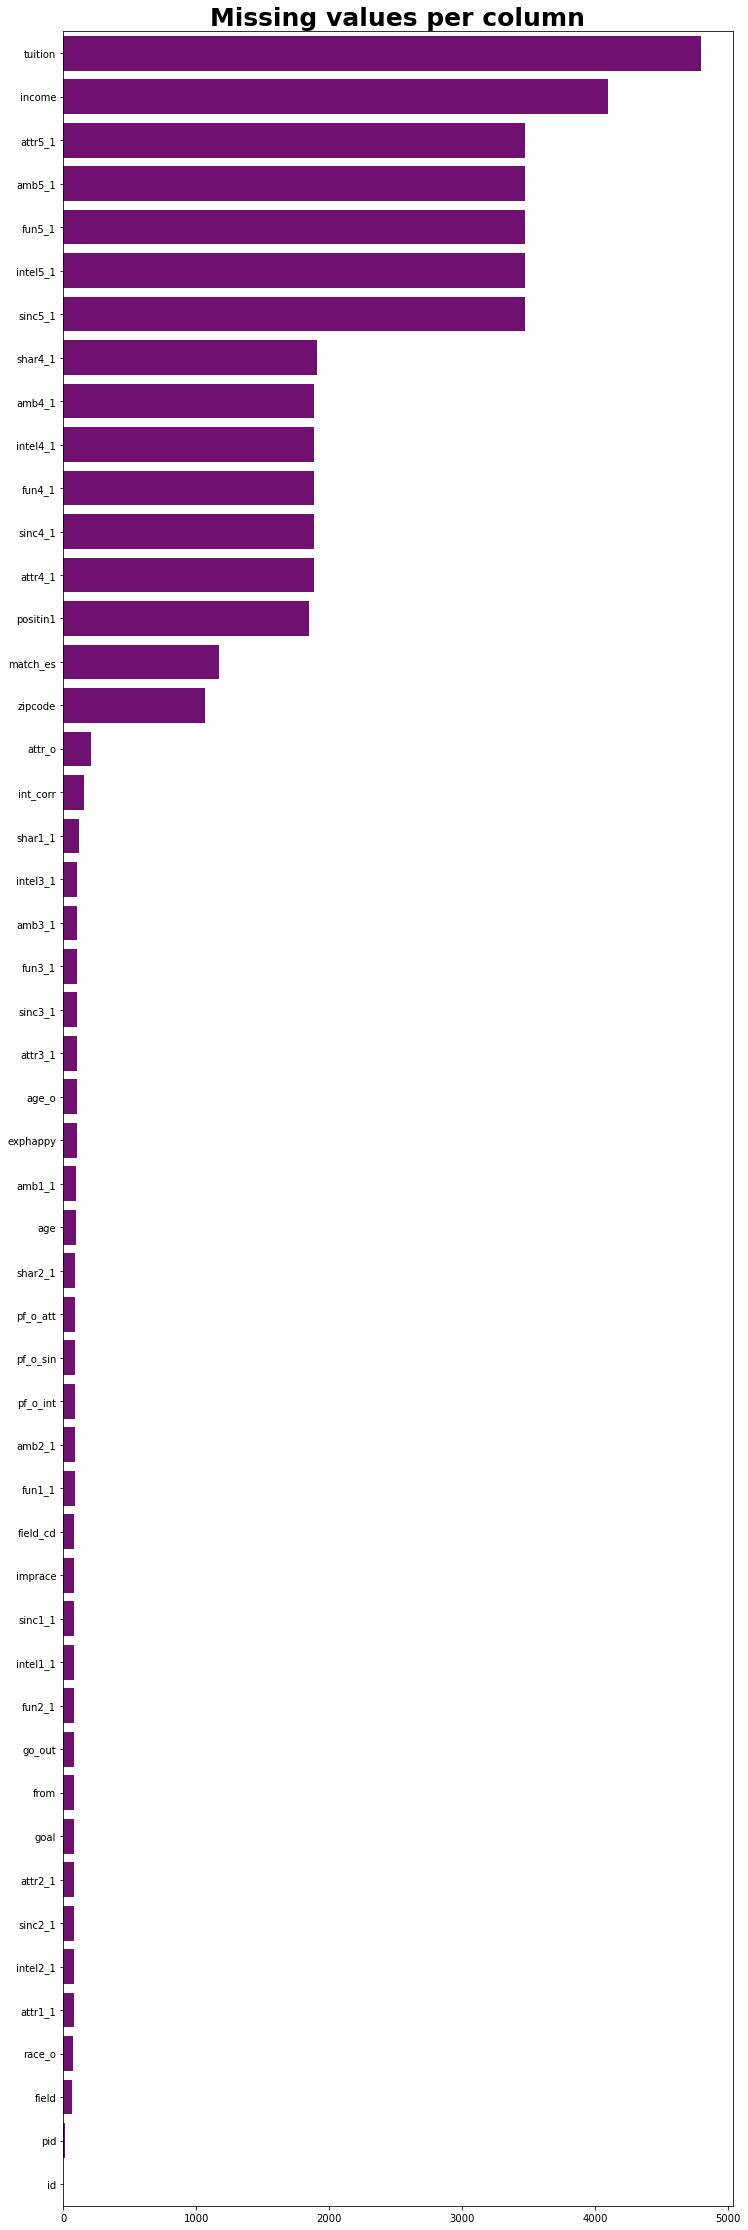

In [25]:
# affichage des valeurs manquantes par colonne
import matplotlib.pyplot as plt
allna = (df.isnull().sum() )
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 40))
sns.barplot(allna,allna.index,color='purple')
plt.title('Missing values per column', fontsize=25, weight='bold' )
plt.show()

### Age distribution 

In [26]:
# filtre sur les ages / genres 
mycolumns = ['iid','age','gender']
df_1 = df[mycolumns]

<AxesSubplot:xlabel='age', ylabel='Count'>

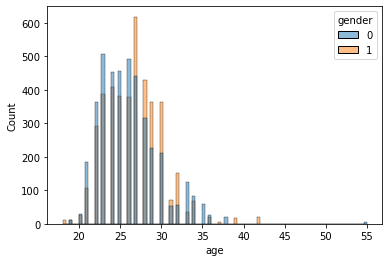

In [29]:
# Distribution entre les genres par age (0 = femme, 1 = homme)
sns.histplot(data = df, x= "age", hue = "gender")

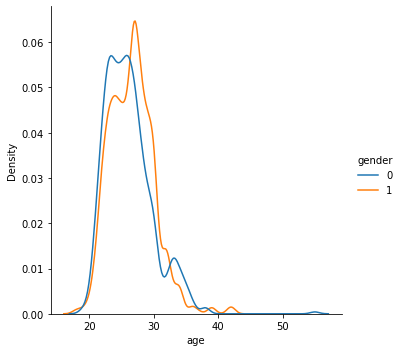

In [28]:
# Densité de distribution (0 = femme, 1 = homme)
sns.displot(data = df, x="age", kind = "kde", hue="gender")

<AxesSubplot:xlabel='gender', ylabel='age'>

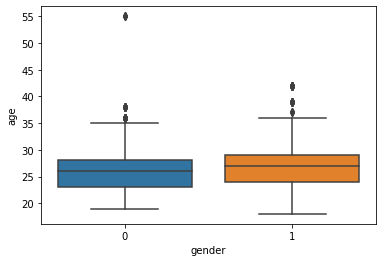

In [132]:
#Boite à moustache (0 = femme, 1 = homme)
sns.boxplot(data = df, x="gender", y = "age")

### Mean Intrests of people in different activities

/tmp/ipykernel_898/2200870559.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  _=sns.barplot(dataset.mean().loc[activities].index,dataset.mean().loc[activities].values).set_xticklabels(activities,rotation=90)
/tmp/ipykernel_898/2200870559.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  _=sns.barplot(dataset.mean().loc[activities].index,dataset.mean().loc[activities].values).set_xticklabels(activities,rotation=90)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

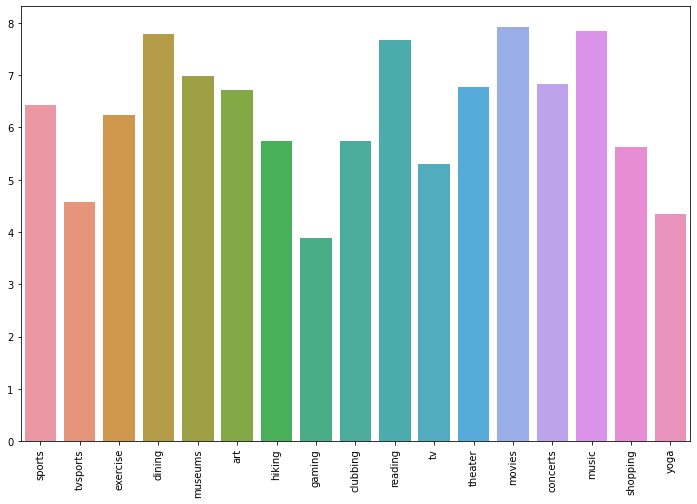

In [30]:
# Intéret des pariticipants pour les différentes activités 
activities=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']
plt.figure(figsize=(12,8))
_=sns.barplot(dataset.mean().loc[activities].index,dataset.mean().loc[activities].values).set_xticklabels(activities,rotation=90)

In [31]:
# séparer les colonnes sur les attributs d'attractivité (selon les critères définis dans la documentation )
cols_attribs = ["attr1_1", "sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]

In [32]:
dataset[cols_attribs].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000
mean,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111
std,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000
50%,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000
75%,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000
max,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


In [33]:
#vérifier que les notes attribuées aux vagues entre 6 et 9 sont bien comprises entre 1 et 10
dataset[(dataset.wave.isin([6,7,8,9]))][cols_attribs].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,1557.000000,1557.00000,1557.000000,1557.000000,1557.000000,1557.000000
mean,16.158304,17.82194,18.990886,17.910328,14.733789,14.386532
std,3.515382,2.75362,1.993004,2.440198,4.180549,3.946962
min,6.670000,5.13000,14.710000,12.500000,2.330000,2.270000
25%,14.290000,16.67000,17.390000,16.670000,13.040000,12.500000
50%,16.000000,17.78000,18.870000,17.950000,15.690000,14.890000
75%,18.000000,19.44000,20.000000,19.230000,17.780000,17.070000
max,27.780000,23.81000,23.810000,27.780000,20.590000,23.810000


In [34]:
# filtrer sur le contenu de chaque vague et s'assurer que la somme des notes des attributs est égale à 100
dataset[dataset["wave"]==1][cols_attribs].groupby(id).mean()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
139956104947984,15.0,20.0,20.0,15.0,15.0,15.0
139956104948016,15.0,20.0,20.0,15.0,15.0,15.0
139956104948048,15.0,20.0,20.0,15.0,15.0,15.0
139956104948080,15.0,20.0,20.0,15.0,15.0,15.0
139956104948112,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...
139956105142768,100.0,0.0,0.0,0.0,0.0,0.0
139956105142800,100.0,0.0,0.0,0.0,0.0,0.0
139956105142832,100.0,0.0,0.0,0.0,0.0,0.0
139956105142864,100.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#élargir la vérification des attirbuts pour toutes les questions 
dict_list_attribute = {
    1 : ["attr1_1", "sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]
,   2 : ["attr2_1", "sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1"]
,   3 : ["attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1","shar3_1"]
,   4 : ["attr4_1", "sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1"]
,   5 : ["attr5_1", "sinc5_1","intel5_1","fun5_1","amb5_1","shar5_1"]
,   6 : ["attr6_1", "sinc6_1","intel6_1","fun6_1","amb6_1","shar6_1"]
}

In [37]:
ATTR_ID = 1
WAVE_ID = 1
list_attribute = dict_list_attribute[ATTR_ID]
dataset[(dataset["wave"]==WAVE_ID)&(df['id']==1)][list_attribute].sum(axis = 1)

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
5      100.0
6      100.0
7      100.0
8      100.0
9      100.0
100    100.0
101    100.0
102    100.0
103    100.0
104    100.0
105    100.0
106    100.0
107    100.0
108    100.0
109    100.0
dtype: float64

In [39]:
ATTR_ID = 1
WAVE_ID = 1
ID = 1
list_attribute = dict_list_attribute[ATTR_ID]
dataset[(dataset["wave"]==WAVE_ID)&(df['id']==ID)][["iid"]+list_attribute+['pid','partner',"attr"]]

,iid,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,pid,partner,attr
0,1,15.0,20.0,20.0,15.0,15.0,15.0,11.0,1,6.0
1,1,15.0,20.0,20.0,15.0,15.0,15.0,12.0,2,7.0
2,1,15.0,20.0,20.0,15.0,15.0,15.0,13.0,3,5.0
3,1,15.0,20.0,20.0,15.0,15.0,15.0,14.0,4,7.0
4,1,15.0,20.0,20.0,15.0,15.0,15.0,15.0,5,5.0
5,1,15.0,20.0,20.0,15.0,15.0,15.0,16.0,6,4.0
6,1,15.0,20.0,20.0,15.0,15.0,15.0,17.0,7,7.0
7,1,15.0,20.0,20.0,15.0,15.0,15.0,18.0,8,4.0
8,1,15.0,20.0,20.0,15.0,15.0,15.0,19.0,9,7.0
9,1,15.0,20.0,20.0,15.0,15.0,15.0,20.0,10,5.0


# Répartition des ages / races

In [41]:
# répartition par race : Black/African American=1 	European/Caucasian-American=2; 	Latino/Hispanic American=3 	Asian/Pacific Islander/Asian-American=4 	Native American=5 	Other=6
dataset.groupby(by=["age","race"])["race"].agg(["count"])

count
age  race       
18.0 4.0      10
19.0 3.0      10
     4.0      10
20.0 1.0      10
     3.0      10
...          ...
37.0 4.0       5
38.0 2.0      19
39.0 2.0      18
42.0 2.0      20
55.0 4.0       6

[77 rows x 1 columns]

# Choix de la variable cible : matching

In [42]:
df['match'].shape

(8378,)

In [43]:
pd.crosstab(index=df["match"], columns="count")

col_0,count
match,
0,6998
1,1380


In [44]:
#% de matching parmi l'ensemble des dates
(1380/6998 ) * 100

19.719919977136325

In [45]:
# Filtre sur les match ayant eu lieu
matched = df[df["match"] == 1]
matched.head()

,id,iid,pid,partner,order,gender,idg,condtn,wave,round,...,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,exphappy,match_es
2,1.0,1,13.0,3,10,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
3,1.0,1,14.0,4,5,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
4,1.0,1,15.0,5,7,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
8,1.0,1,19.0,9,8,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
13,2.0,2,14.0,4,1,0,3,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0


In [46]:
matched.shape

(1380, 62)

# Analyse des attributs d'entrée ayant potentiellement un impact sur le matching 

### Race

In [47]:
#same race 1 = yes, 0 = no
pd.crosstab(index=matched["samerace"], columns="count")

col_0,count
samerace,
0,814
1,566


### Age

In [50]:
age = pd.crosstab(index=matched["age_o"], columns="count").reset_index()
age

col_0,age_o,count
0,19.0,5
1,20.0,14
2,21.0,65
3,22.0,94
4,23.0,144
5,24.0,123
6,25.0,196
7,26.0,146
8,27.0,168
9,28.0,130


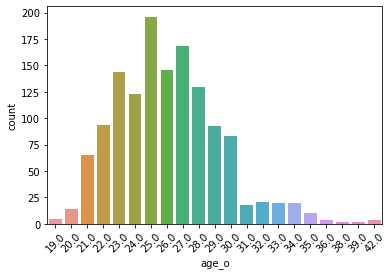

In [37]:
# Ditribution des ages des partners "matched"
sns.barplot(x=age["age_o"], y=age["count"]).set_xticklabels(
    rotation=45, labels=age["age_o"]
);

### Job

In [39]:
cols = [
    "Law  ",
    "Math",
    "Social Science, Psychologist ",
    "Medical Science, Pharmaceuticals, and Bio Tech ",
    "Engineering  ",
    "English/Creative Writing/ Journalism ",
    "History/Religion/Philosophy ",
    "Business/Econ/Finance ",
    "Education, Academia ",
    "Biological Sciences/Chemistry/Physics",
    "Social Work ",
    "Undergrad/undecided ",
    "Political Science/International Affairs ",
    "Film",
    "Fine Arts/Arts Administration",
    "Languages",
    "Architecture",
    "Other",
]

In [46]:
# field_cd ! field coded (1 = Law, 2 = Match...)
fields = pd.crosstab(index=matched["field_cd"], columns="count").reset_index()
fields

col_0,field_cd,count
0,1.0,136
1,2.0,21
2,3.0,128
3,4.0,46
4,5.0,117
5,6.0,48
6,7.0,40
7,8.0,338
8,9.0,95
9,10.0,161


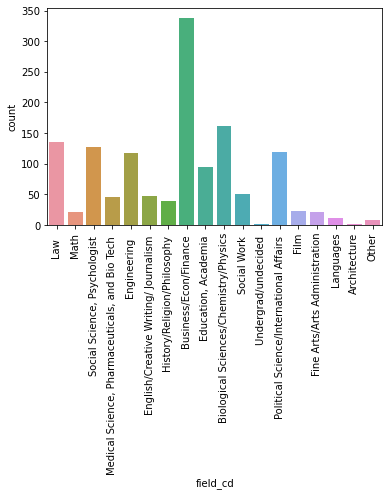

In [48]:
sns.barplot(x=fields["field_cd"], y=fields["count"]).set_xticklabels(
    rotation=90, labels=cols);

### Goal

In [50]:
cols2 = [
    "Seemed like a fun night out",
    "To meet new people",
    "To get a date",
    "Looking for a serious relationship",
    "To say I did it",
    "Other",
]

In [52]:
# goal : What is your primary goal in participating in this event? (Seemed like a fun night out=1 ....)
goal = pd.crosstab(index=matched["goal"], columns="count").reset_index()
goal

col_0,goal,count
0,1.0,583
1,2.0,484
2,3.0,100
3,4.0,51
4,5.0,85
5,6.0,62


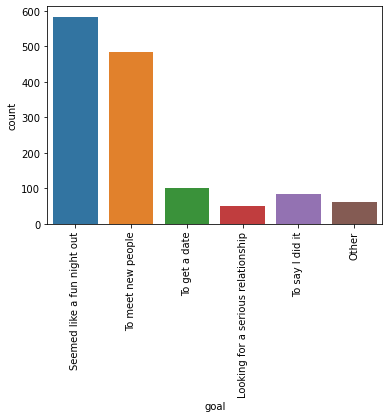

In [53]:
sns.barplot(x=goal["goal"], y=goal["count"]).set_xticklabels(
    rotation=90, labels=cols2);

In [67]:
for a in enumerate(matched.columns):
    print(a)

(0, 'id')
(1, 'iid')
(2, 'pid')
(3, 'partner')
(4, 'order')
(5, 'gender')
(6, 'idg')
(7, 'condtn')
(8, 'wave')
(9, 'round')
(10, 'position')
(11, 'positin1')
(12, 'match')
(13, 'int_corr')
(14, 'samerace')
(15, 'age_o')
(16, 'race_o')
(17, 'pf_o_att')
(18, 'dec_o')
(19, 'attr_o')
(20, 'age')
(21, 'field')
(22, 'field_cd')
(23, 'go_out')
(24, 'tuition')
(25, 'imprace')
(26, 'from')
(27, 'zipcode')
(28, 'income')
(29, 'goal')
(30, 'pf_o_sin')
(31, 'pf_o_int')


### Go out
Several times a week=1, 
Twice a week=2, 
Once a week=3, 
Twice a month=4, 
Once a month=5, 
Several times a year=6, 
Almost never=7

In [56]:
def ret_cross_attr(atrr2):
    temp = pd.crosstab(index=matched[atrr2], columns="count").reset_index()
    return sns.barplot(x=temp[atrr2], y=temp["count"])

<AxesSubplot:xlabel='go_out', ylabel='count'>

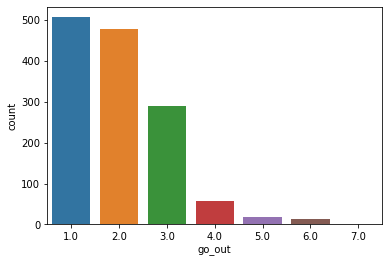

In [89]:
#Several times a week=1, Twice a week=2, Once a week=3, Twice a month=4, Once a month=5, Several times a year=6, Almost never=7
ret_cross_attr("go_out")

### How do you think others perceive you ? -> Attractiveness

<AxesSubplot:xlabel='attr5_1', ylabel='count'>

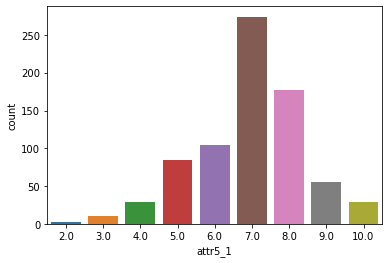

In [90]:
ret_cross_attr("attr5_1")

### How do you think others perceive you ? -> Fun

<AxesSubplot:xlabel='fun5_1', ylabel='count'>

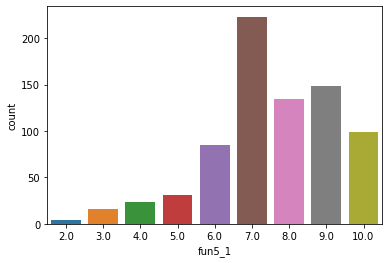

In [91]:
ret_cross_attr("fun5_1")

### How do you think others perceive you ? -> Ambitious

<AxesSubplot:xlabel='amb5_1', ylabel='count'>

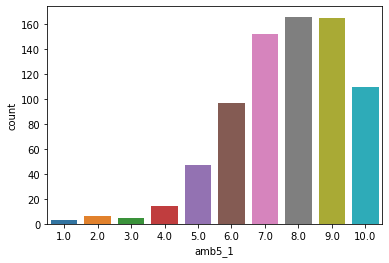

In [92]:
ret_cross_attr("amb5_1")

### How happy do you expect it will make you?

<AxesSubplot:xlabel='exphappy', ylabel='count'>

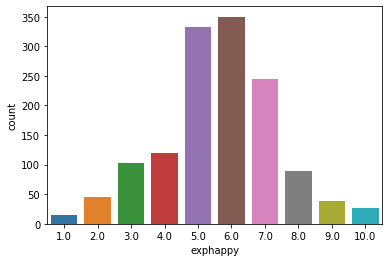

In [105]:
ret_cross_attr("exphappy")

### Compare with personal confidence

<AxesSubplot:xlabel='match_es', ylabel='count'>

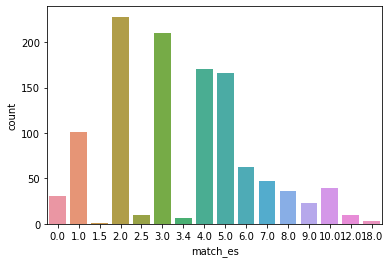

In [127]:
# match_es : How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?
ret_cross_attr("match_es")

### Rating

<AxesSubplot:xlabel='attr_o', ylabel='count'>

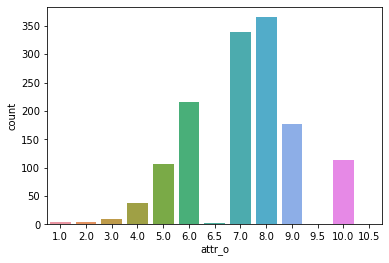

In [137]:
# attr_o : rating by partner the night of the event, for all 6 attributes
ret_cross_attr("attr_o")

# Some Features of the ones who got a 10

In [51]:
# analyse sur partneres qui ont eu la note de 10 sur les 6 attribus
ten = matched[matched["attr_o"] == 10]
ten.head()

,id,iid,pid,partner,order,gender,idg,condtn,wave,round,...,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,exphappy,match_es
2,1.0,1,13.0,3,10,0,1,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
72,8.0,8,13.0,3,3,0,15,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
82,9.0,9,13.0,3,4,0,17,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
92,10.0,10,13.0,3,5,0,19,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
118,2.0,12,9.0,9,7,1,4,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0


In [52]:
ten.shape

(114, 62)

In [53]:
matched.shape

(1380, 62)

### Race

In [54]:
pd.crosstab(index=ten["samerace"], columns="count")

col_0,count
samerace,
0,63
1,51


### Age

In [55]:
age = pd.crosstab(index=ten["age_o"], columns="count").reset_index()
age.head(3)

col_0,age_o,count
0,20.0,1
1,21.0,9
2,22.0,16


''

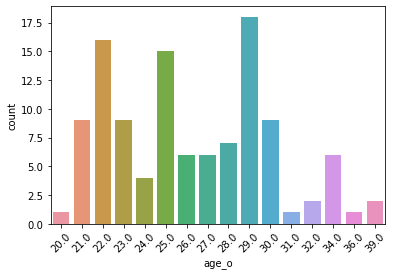

In [56]:
sns.barplot(x=age["age_o"], y=age["count"]).set_xticklabels(
    rotation=45, labels=age["age_o"]
)
;

### Job

In [57]:
cols = [
    "Law  ",
    "Math",
    "Social Science, Psychologist ",
    "Medical Science, Pharmaceuticals, and Bio Tech ",
    "Engineering  ",
    "English/Creative Writing/ Journalism ",
    "History/Religion/Philosophy ",
    "Business/Econ/Finance ",
    "Education, Academia ",
    "Biological Sciences/Chemistry/Physics",
    "Social Work ",
    "Undergrad/undecided ",
    "Political Science/International Affairs ",
    "Film",
    "Fine Arts/Arts Administration",
    "Languages",
    "Architecture",
    "Other",
]

In [58]:
fields = pd.crosstab(index=ten["field_cd"], columns="count").reset_index()
fields

col_0,field_cd,count
0,1.0,15
1,3.0,12
2,4.0,6
3,5.0,7
4,6.0,3
5,7.0,2
6,8.0,24
7,9.0,6
8,10.0,13
9,11.0,3


### Importance of different qualities

/tmp/ipykernel_898/2861926749.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(q4.index,rotation=45)


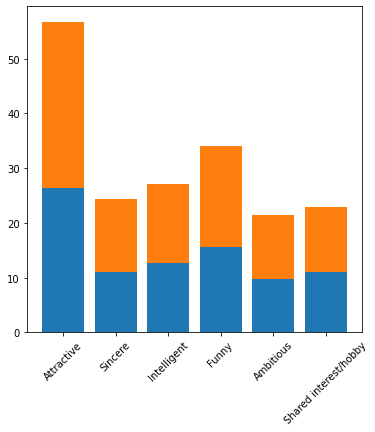

In [59]:
quality4=['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']
quality2=['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']
q4=df[df['attr4_1'].notna()][quality4].mean()
q4.index=['Attractive','Sincere','Intelligent','Funny','Ambitious','Shared interest/hobby']
q2=df[df['attr2_1'].notna()][quality2].mean()
q2.index=['Attractive','Sincere','Intelligent','Funny','Ambitious','Shared interest/hobby']

fig,ax=plt.subplots(figsize=(6,6))
ax.bar(q4.index,q4)
ax.bar(q2.index,q2,bottom=q4)
_=ax.set_xticklabels(q4.index,rotation=45)

### Desired qualities based on gender

In [60]:
# score moyen attr2_1, premier critère de réponse à la question What do you think the opposite sex looks for in a date?
qual_by_gender=df[df['attr2_1'].notna()].groupby('gender')[quality2].agg('mean')

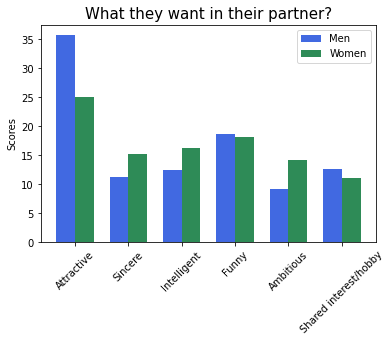

In [61]:
N = 6
menMeans = qual_by_gender.iloc[0].values
#menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', )

womenMeans = qual_by_gender.iloc[1].values
#womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', )

# add some
ax.set_ylabel('Scores')
ax.set_title('What they want in their partner?', fontsize=15)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ['Attractive','Sincere','Intelligent','Funny','Ambitious','Shared interest/hobby'],rotation=45 )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()